In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import glob as glob # glob is used to search/locate any file present in the system
import shutil #Used for moving files from one folder to another
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2 as cv

In [2]:
URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
#Getting file from url

zip_file=tf.keras.utils.get_file(origin=URL, fname='flower_photos.tgz', extract=True)

base_dir=os.path.join(os.path.dirname(zip_file),'flower_photos')

The folder has the following structure
#### flower_photos
#### |__ daisy
#### |__ dandelion
#### |__ roses
#### |__ sunflowers
#### |__ tulips


In [4]:
#Splitting into train,validation,test dataset 
labels=['daisy','dandelion','roses','sunflowers','tulips']

for label in labels:
    img_path=os.path.join(base_dir,label) #Getting the images path
    images=glob.glob(img_path+'/*.jpg') #Getting the images
    print(f'{label}:{len(images)}')
    training, validation=images[:round(len(images)*0.8)],images[round(len(images)*0.8):]
    
    #Sending images to training folder
    for train in training:
        if not os.path.exists(os.path.join(base_dir,'train',label)):
            os.makedirs(os.path.join(base_dir,'train',label))
        shutil.move(train, os.path.join(base_dir,'train',label))
    
    #Sending images to validation folder
    for val in validation:
        if not os.path.exists(os.path.join(base_dir,'val',label)):
            os.makedirs(os.path.join(base_dir,'val',label))
        shutil.move(val, os.path.join(base_dir,'val',label))

daisy:633


Error: Destination path 'C:\Users\Shirshak\.keras\datasets\flower_photos\train\daisy\100080576_f52e8ee070_n.jpg' already exists

In [9]:
train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'val')

In [1]:
IMG_SHAPE=224
BATCH_SIZE=32

In [2]:
#Creating training_generator and validation_generator

train_generator=ImageDataGenerator(rescale=1./255)
val_generator=ImageDataGenerator(rescale=1./255)

train_generator=train_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                                directory=train_dir,
                                                                shuffle=True,
                                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                class_mode='sparse')

val_generator=val_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                            directory=val_dir,
                                                            shuffle=False,
                                                            target_size=(IMG_SHAPE,IMG_SHAPE),
                                                            class_mode='sparse')

NameError: name 'ImageDataGenerator' is not defined

In [12]:
#Function for plotting images
def PlotImg(image):
    current_image=np.array(image)
    current_image = current_image.reshape(150,150,3) 
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


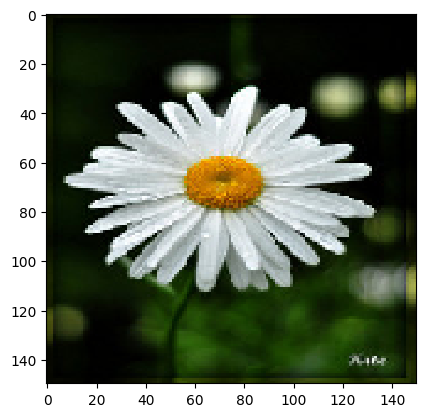

In [13]:
#Testing if images were exported correctly
img=[val_generator[0][0][0]]
PlotImg(img)

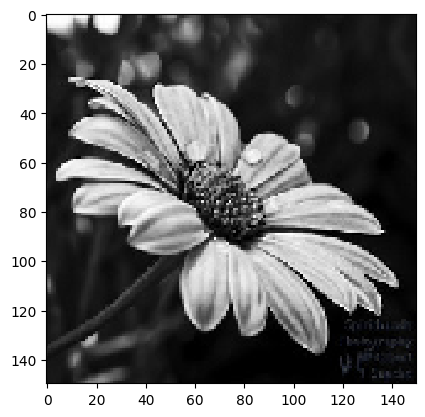

In [14]:
img=[train_generator[0][0][0]]
PlotImg(img)

In [15]:
#Creating Model
def model_function():
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16,(3,3),strides=2,padding='same',input_shape=(150,150,3),activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
    
    model.add(tf.keras.layers.Conv2D(32,(3,3),strides=2,padding='same',activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
    
    model.add(tf.keras.layers.Conv2D(64,(3,3),strides=2,padding='same',activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(512,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(5,activation='softmax'))
    
    return model

## Test on not augmented dataset

In [16]:
model=model_function()
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator,epochs=10,validation_data=val_generator)
model.summary()

Epoch 1/10
92/92 [==============================] - 15s 87ms/step - loss: 1.3682 - accuracy: 0.3809 - val_loss: 1.1632 - val_accuracy: 0.5048
Epoch 2/10
92/92 [==============================] - 5s 54ms/step - loss: 1.1436 - accuracy: 0.5237 - val_loss: 1.0429 - val_accuracy: 0.6027
Epoch 3/10
92/92 [==============================] - 5s 53ms/step - loss: 1.0265 - accuracy: 0.5911 - val_loss: 1.0162 - val_accuracy: 0.5673
Epoch 4/10
92/92 [==============================] - 5s 53ms/step - loss: 0.9369 - accuracy: 0.6239 - val_loss: 0.9464 - val_accuracy: 0.6068
Epoch 5/10
92/92 [==============================] - 5s 56ms/step - loss: 0.8870 - accuracy: 0.6436 - val_loss: 0.9286 - val_accuracy: 0.6177
Epoch 6/10
92/92 [==============================] - 5s 54ms/step - loss: 0.8165 - accuracy: 0.6780 - val_loss: 0.8196 - val_accuracy: 0.6816
Epoch 7/10
92/92 [==============================] - 5s 53ms/step - loss: 0.7893 - accuracy: 0.6886 - val_loss: 0.8655 - val_accuracy: 0.6680
Epoch 8/10
9

In [17]:
val_accuracy=history.history['val_accuracy']
train_accuracy=history.history['accuracy']

val_loss=history.history['val_loss']
train_loss=history.history['loss']

Text(0, 0.5, 'accuracy')

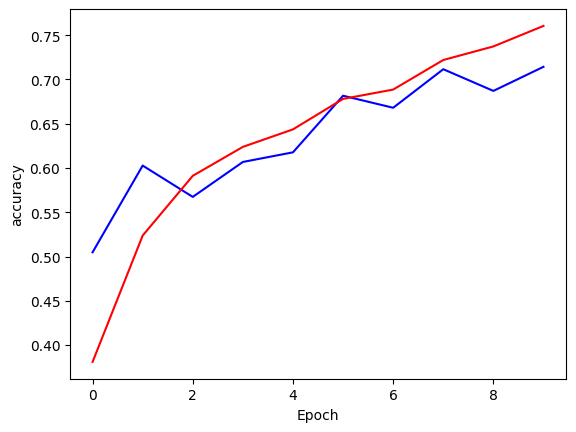

In [18]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.arange(10),val_accuracy,color='blue')
ax.plot(np.arange(10),train_accuracy, color='red')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')

Text(0, 0.5, 'accuracy')

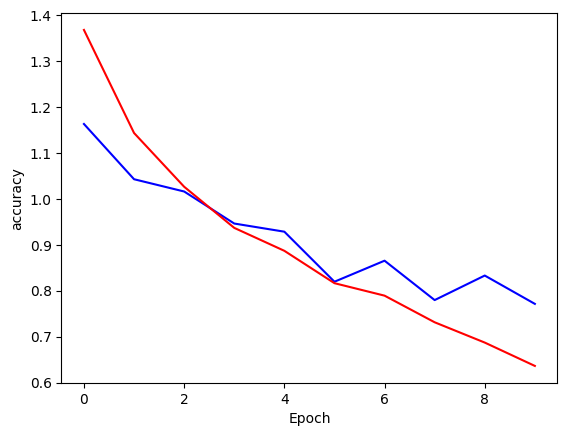

In [19]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.arange(10),val_loss,color='blue')
ax.plot(np.arange(10),train_loss, color='red')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')

In [20]:
#Hence the model overfits

In [28]:
layer_output=model.get_layer('dense_1').output  #get the Output of the Layer

intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output) #Intermediate model between Input Layer and Output Layer which we are concerned about

intermediate_prediction=intermediate_model.predict(train_generator) #predicting in the Intermediate Node

In [35]:
l=[]

for val in intermediate_prediction:
    l.append(np.argmax(val))
l

[1,
 2,
 4,
 2,
 0,
 2,
 1,
 4,
 2,
 3,
 3,
 1,
 1,
 3,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 3,
 4,
 0,
 1,
 2,
 1,
 4,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 1,
 3,
 1,
 4,
 0,
 4,
 1,
 3,
 3,
 4,
 1,
 3,
 4,
 1,
 3,
 3,
 4,
 3,
 3,
 0,
 2,
 4,
 1,
 1,
 3,
 0,
 3,
 1,
 3,
 1,
 3,
 3,
 4,
 3,
 0,
 1,
 3,
 3,
 4,
 0,
 3,
 1,
 1,
 4,
 2,
 0,
 0,
 0,
 3,
 4,
 0,
 2,
 1,
 3,
 0,
 1,
 1,
 2,
 4,
 1,
 2,
 1,
 2,
 4,
 3,
 4,
 1,
 3,
 4,
 2,
 4,
 0,
 4,
 4,
 4,
 2,
 2,
 3,
 4,
 1,
 4,
 3,
 2,
 1,
 2,
 3,
 3,
 3,
 2,
 3,
 1,
 1,
 4,
 0,
 4,
 1,
 4,
 1,
 2,
 1,
 1,
 2,
 1,
 4,
 4,
 4,
 2,
 2,
 4,
 1,
 1,
 4,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 3,
 1,
 3,
 4,
 3,
 3,
 1,
 2,
 3,
 0,
 4,
 1,
 0,
 0,
 4,
 1,
 1,
 0,
 1,
 1,
 1,
 3,
 4,
 0,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 4,
 3,
 0,
 1,
 1,
 3,
 4,
 1,
 2,
 3,
 0,
 3,
 0,
 2,
 1,
 0,
 1,
 3,
 4,
 1,
 1,
 3,
 1,
 4,
 2,
 0,
 2,
 1,
 0,
 4,
 4,
 1,
 0,
 3,
 2,
 4,
 2,
 0,
 4,
 1,
 2,
 1,
 1,
 2,
 4,
 4,
 0,
 1,
 3,
 2,
 1,
 1,
 2,
 4,
 2,


In [25]:
outputs

[<KerasTensor: shape=(None, 75, 75, 16) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 37, 37, 16) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 19, 19, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 9, 9, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 2, 2, 64) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dropout')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dropout_1')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense_1')>]

## Performing Data Augmentation

In [21]:
#Deciding our augmentation factors
image_generator=ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    zoom_range=.5,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    fill_mode='reflect'
)

In [22]:
train_generator_augmented=image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=train_dir,
                                                              shuffle=True,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='sparse')

Found 2935 images belonging to 5 classes.


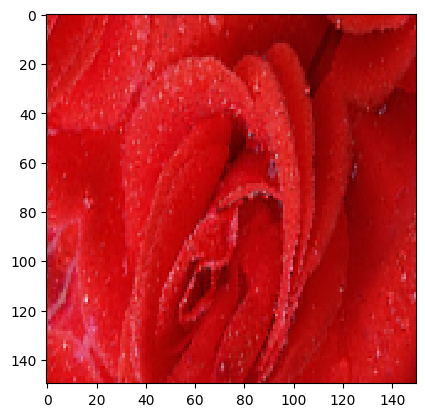

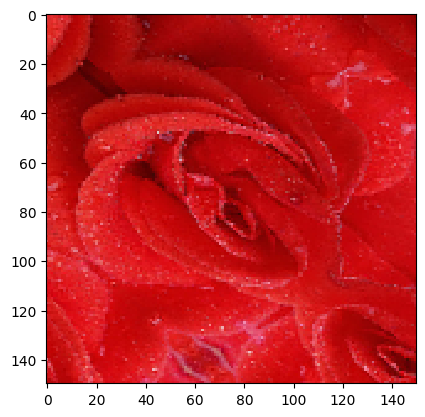

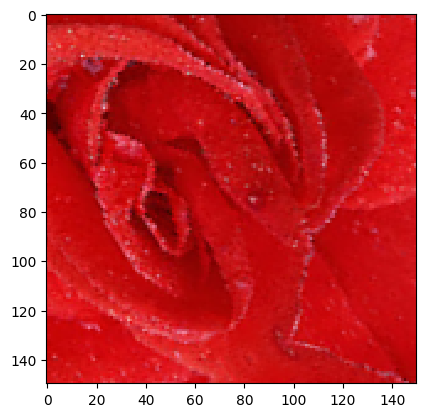

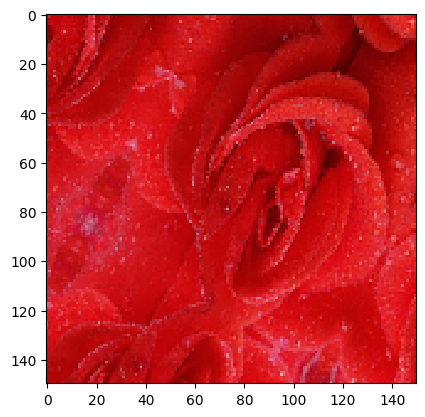

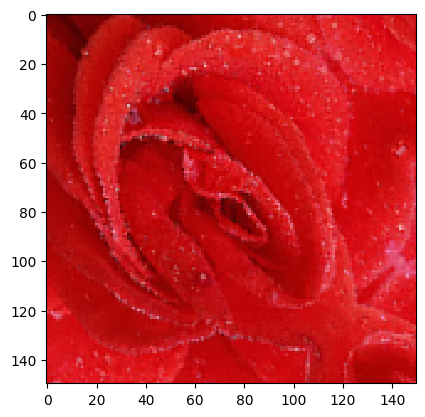

In [23]:
augmented_images=[train_generator_augmented[0][0][0] for i in range(5)]
for img in enumerate(augmented_images):
    PlotImg(img[1])

In [36]:
#Declaring call back
callback=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=6,
    mode='min',
    baseline=None,
    restore_best_weights=True,
)

In [37]:
#Trying with augmented data
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(
    train_generator_augmented,
    epochs=20,validation_data=val_generator,
    steps_per_epoch=int(np.ceil(train_generator_augmented.n / float(BATCH_SIZE))),
    validation_steps=int(np.ceil(val_generator.n / float(BATCH_SIZE))),
    callbacks=callback
)

Epoch 1/20
92/92 [==============================] - 13s 137ms/step - loss: 0.6687 - accuracy: 0.7400 - val_loss: 0.6780 - val_accuracy: 0.7551
Epoch 2/20
92/92 [==============================] - 13s 138ms/step - loss: 0.6363 - accuracy: 0.7509 - val_loss: 0.6978 - val_accuracy: 0.7565
Epoch 3/20
92/92 [==============================] - 13s 137ms/step - loss: 0.6456 - accuracy: 0.7520 - val_loss: 0.6863 - val_accuracy: 0.7238
Epoch 4/20
92/92 [==============================] - 12s 133ms/step - loss: 0.6282 - accuracy: 0.7537 - val_loss: 0.6935 - val_accuracy: 0.7633
Epoch 5/20
92/92 [==============================] - 12s 132ms/step - loss: 0.6326 - accuracy: 0.7591 - val_loss: 0.6522 - val_accuracy: 0.7619
Epoch 6/20
92/92 [==============================] - 12s 131ms/step - loss: 0.6413 - accuracy: 0.7489 - val_loss: 0.6653 - val_accuracy: 0.7633
Epoch 7/20
92/92 [==============================] - 12s 134ms/step - loss: 0.6295 - accuracy: 0.7543 - val_loss: 0.6207 - val_accuracy: 0.7796

In [38]:
val_accuracy_aug=history.history['val_accuracy']
train_accuracy_aug=history.history['accuracy']

In [39]:
val_loss_aug=history.history['val_loss']
train_loss_aug=history.history['loss']

Text(0, 0.5, 'accuracy')

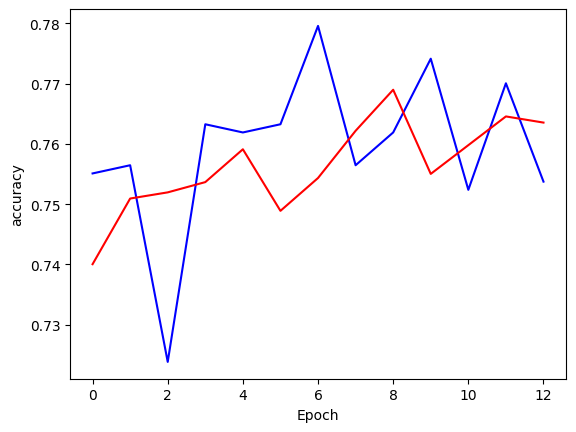

In [41]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.arange(13),val_accuracy_aug,color='blue')
ax.plot(np.arange(13),train_accuracy_aug, color='red')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')

Text(0, 0.5, 'accuracy')

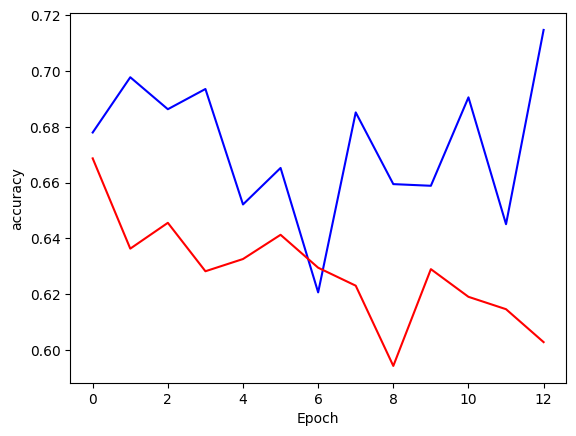

In [42]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.arange(13),val_loss_aug,color='blue')
ax.plot(np.arange(13),train_loss_aug, color='red')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')

## Saving the model

In [43]:
model.save_weights('./checkpoints/my_checkpoint')

In [11]:
model=model_function()

In [12]:
model.load_weights('./checkpoints/my_checkpoint')

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./checkpoints/my_checkpoint

## Testing Model

In [6]:
labels=['daisy','dandelion','roses','sunflowers','tulips']
test_dir=r'C:\Users\Shirshak\Tensorflow Tutorials\Flower classification\test'
def test_img(img):
    im = cv.imread(img)
    im=cv.resize(im,(150,150),interpolation=cv.INTER_AREA)
    im=cv.cvtColor(im,cv.COLOR_BGR2RGB)
    im=im/255
    test=[im]
    test=np.array(test)
    prediction=np.argmax(model.predict(test))
    return labels[prediction],im

In [7]:
img=r'C:\Users\Shirshak\Tensorflow Tutorials\Flower classification\test\tulip1.jpg'
pred,im=test_img(img)

In [8]:
PlotImg(im)
print(f'The following image is of a:{pred}')

NameError: name 'PlotImg' is not defined